In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from src.pipeline import *
%autoreload

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [192]:
path = 'Data/2017 Pew Research Center Science and News Survey/Segmentation_data.csv'

In [193]:
NEWS_ATTITUDES_BEHAVIORS = ['Very interested in local community news', 
                            'Very interested in sports news', 
                            'Very interested in business and finance news', 
                            'Very interested in science news',
                            'Very interested in entertainment news',
                            'Enjoy science news a lot more than other news', 
                            'I know a lot about science',
                            'Enjoy talking with others about what\'s happening in science is a major reason to follow science news',
                            'It is related to things I need to know for my job is a major reason to follow science news',
                            'Helps me make decision about every day life is a major reason to follow science news',
                            'I feel I have a social or civil obligation to stay informed is a major reason to follow science news',
                            'I am curious about what\'s happening in science is a major reason to follow science news',
                            'It is related to my activities, hobbies or interests is a major reason to follow science news',
                            'Science news is boring is a major reason to not follow science news',
                            'Science news is hard to understand is a major reason to not follow science news',
                            "I often disagree with science news is a major reason to not follow science news",
                            "Science news is less important than other topics is a major reason to not follow science news",
                            "I am too busy to keep up with science news more often is a major reason to not follow science news",
                            "I already get enough science news is a major reason to not follow science news",
                            "The sources I regulary get news from don't cover a lot of science is a major reason to not follow science news",
                            "The science topics I'm most interested in are not covered often is a major reason to not follow science news",
                            'I read, watch or listen to science news nearly every day',
                            'I read, watch or listen to science news a few times a week',
                            'I read, watch or listen to science news a few times a month',
                            'I read, watch or listen to science news less often than a few times a month',   
                            'Most interested in health & medicine', 
                            'Most interested in technology', 
                            'Most interested in energy and environment',
                            'Most interested in food and nutrition',
                            'Most interested in space and astronomy', 
                            'Most interested in evolution of human & animals',
                            'Most interested in the mind and brain',
                            'News media does a very good job in covering science',
                            'Follow science organizations, people or pages on social media',
                            'I have science-related hobbies, interests or activities outside of work']

HOBBIES_NONSCIENCE_BEHAVIORS = ['Visited zoo',
                                'Visited art museum',
                                'Visited natural history museum',
                                'Visited science/tech center/museum',
                                'Visited national, state or country park',
                                'Visited public library',
                                'Attended event with live music',
                                'Attended sport event',
                                'Attended science lecture/talk',
                                'Use social media']


DEMOGRAPHICS = ['Industry: Health Care & Social Assistance',
                'Industry: Educational Services',
                'Industry: Professional, Scientific & Technical services',
                'Industry: Retail Trade',
                'Industry: Manufacturing',
                'Industry: Other Services & Community/Non-Profit Organizations',
                'Industry: Finance and Insurance',
                'Industry: Construction',
                'Industry: Accommodation & Food Services',
                'Industry: Transportation & Warehousing',
                'Industry: Information',
                "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65-74", "75+", 
                'Male', 'Female']

In [194]:
segment_vars = ['ENJOY', 'KNOWLEDGE', 'SCIOFTEN', 'TOPICS1']
data, segment_data = get_cluster_data(path, segment_vars)

In [239]:
k_vals = [3, 4, 5, 6, 7, 8, 9, 10]

## KMeans

[0.45112717371537525, 0.3852768203746741, 0.3981587866055421, 0.3570766723232495, 0.39152436653416917, 0.4108460926958057, 0.41415627976640695, 0.44554848360621163]


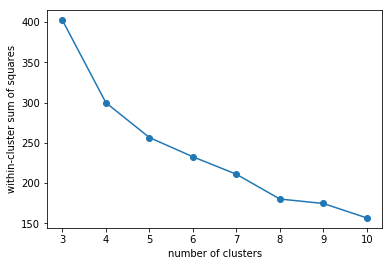

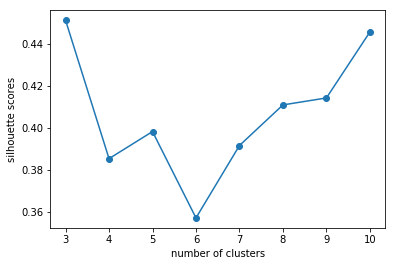

In [240]:
plot_scores_kmeans(segment_data, k_vals)

### 3 Segment Solution

In [197]:
km3 = KMeans(n_clusters = 3)
km3.fit(segment_data)
labelsk3 = km3.labels_
database_datak3 = data.copy()
database_datak3['Segment'] = labelsk3
dfk_3 = get_database(database_datak3)

#### Segment Sizes 

In [228]:
print('Size of Segment 0: {}'.format(len(labelsk3[labelsk3==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsk3[labelsk3==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsk3[labelsk3==2])/len(segment_data)))

Size of Segment 0: 0.3197526373226628
Size of Segment 1: 0.4554383412149873
Size of Segment 2: 0.22480902146234993


#### Looking at the Database

In [198]:
dfk_3.loc[NEWS_ATTITUDES_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
"I read, watch or listen to science news a few times a month",2.39,31.31,74.27
Very interested in local community news,53.47,38.02,44.98
I am curious about what's happening in science is a major reason to follow science news,78.61,25.40,36.73
Most interested in health & medicine,27.65,31.47,28.80
"I read, watch or listen to science news less often than a few times a month",0.00,50.08,23.79
Most interested in technology,22.64,14.70,18.93
Very interested in business and finance news,32.08,14.38,18.12
Very interested in sports news,17.52,18.69,17.64
Very interested in science news,62.57,10.38,15.05
Helps me make decision about every day life is a major reason to follow science news,25.26,14.38,14.56


In [199]:
dfk_3.loc[HOBBIES_NONSCIENCE_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
Use social media,68.71,70.45,68.93
"Visited national, state or country park",67.92,46.09,54.05
Attended event with live music,57.68,39.70,43.69
Visited public library,57.34,41.13,41.42
Attended sport event,42.43,38.10,37.86
Visited zoo,35.84,29.55,29.94
Visited art museum,39.93,18.85,25.40
Visited natural history museum,26.17,13.18,15.86
Visited science/tech center/museum,33.33,14.30,15.70
Attended science lecture/talk,22.98,5.67,6.47


In [200]:
dfk_3.loc[DEMOGRAPHICS]

Segment,0,1,2
Industry: Health Care & Social Assistance,8.53,9.11,5.18
Industry: Educational Services,9.44,7.27,6.80
"Industry: Professional, Scientific & Technical services",9.67,4.71,7.44
Industry: Retail Trade,5.46,6.47,6.80
Industry: Manufacturing,5.01,4.39,5.66
Industry: Other Services & Community/Non-Profit Organizations,2.62,4.47,4.37
Industry: Finance and Insurance,2.50,3.99,4.69
Industry: Construction,2.96,3.12,2.91
Industry: Accommodation & Food Services,2.50,3.12,2.75
Industry: Transportation & Warehousing,2.05,3.12,2.91


In [201]:
dfk_3.sort_values(2, ascending = False)

Segment,0,1,2
SEGMENT SIZE,879.00,1252.00,618.00
Get science news on a lot of different topics,100.00,0.00,100.00
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,84.19,95.21,93.04
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",87.26,82.19,89.16
"I do not have science-related hobbies, interests or activities outside of work",59.61,88.98,89.00
Live in metro area,87.49,84.50,86.89
Get science news sources that cover all sorts of topics,66.78,76.28,84.47
I own a smartphone,84.53,76.84,78.96
I mostly get science news because I happen to come across it,49.03,77.72,78.80
Science news is boring is not a reason to not follow science news,91.70,65.73,78.80


### 4 Segment Solution

In [235]:
km4 = KMeans(n_clusters = 4)
km4.fit(segment_data)
labelsk4 = km4.labels_
database_datak4 = data.copy()
database_datak4['Segment'] = labelsk4
dfk_4 = get_database(database_datak4)

#### Segment Sizes

In [237]:
print('Size of Segment 0: {}'.format(len(labelsk4[labelsk4==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsk4[labelsk4==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsk4[labelsk4==2])/len(segment_data)))
print('Size of Segment 3: {}'.format(len(labelsk4[labelsk4==3])/len(segment_data)))

Size of Segment 0: 0.25936704256093124
Size of Segment 1: 0.3132048017460895
Size of Segment 2: 0.196071298654056
Size of Segment 3: 0.23135685703892325


#### Looking at the Database

In [253]:
dfk_4.sort_values(3, ascending = False)

Segment,0,1,2,3
SEGMENT SIZE,713.00,861.00,539.00,636.00
Get science news on a lot of different topics,0.00,100.00,0.00,100.00
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,96.63,83.97,93.32,93.08
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",81.91,87.46,82.56,88.84
"I do not have science-related hobbies, interests or activities outside of work",95.51,59.47,80.33,88.36
Live in metro area,80.65,87.46,89.61,86.95
Get science news sources that cover all sorts of topics,78.96,66.90,72.73,83.81
Science news is boring is not a reason to not follow science news,57.22,91.52,76.99,79.40
I own a smartphone,73.07,84.44,81.82,79.25
The way news reporters cover scientific research findings is a bigger problem than the way science researchers publish new findigns,72.65,81.65,77.92,78.93


In [263]:
dfk_4.loc[NEWS_ATTITUDES_BEHAVIORS].sort_values(3, ascending = False)

Segment,0,1,2,3
"I read, watch or listen to science news a few times a month",13.60,0.35,54.73,75.00
Very interested in local community news,34.08,54.24,43.23,44.18
I am curious about what's happening in science is a major reason to follow science news,10.94,78.51,44.53,38.05
Most interested in health & medicine,33.66,28.11,28.57,28.14
"I read, watch or listen to science news less often than a few times a month",86.40,0.00,2.04,23.11
Most interested in technology,11.78,22.65,18.55,19.03
Very interested in business and finance news,10.10,32.52,20.04,17.92
Very interested in sports news,16.97,17.77,20.96,17.30
Very interested in science news,2.10,62.83,21.34,16.04
Helps me make decision about every day life is a major reason to follow science news,10.80,25.32,19.11,14.78


In [264]:
dfk_4.loc[HOBBIES_NONSCIENCE_BEHAVIORS].sort_values(3, ascending = False)

Segment,0,1,2,3
Use social media,70.83,68.41,69.94,69.34
"Visited national, state or country park",39.27,68.18,55.10,54.09
Attended event with live music,37.03,58.30,43.23,43.24
Visited public library,34.08,57.49,50.46,41.67
Attended sport event,34.22,43.09,43.23,37.11
Visited zoo,27.21,35.77,32.65,30.19
Visited art museum,13.18,40.19,26.35,25.47
Visited science/tech center/museum,9.26,33.45,20.96,16.04
Visited natural history museum,8.84,26.60,18.92,15.57
Attended science lecture/talk,1.68,23.23,10.95,6.60


In [265]:
dfk_4.loc[DEMOGRAPHICS].sort_values(3, ascending = False)

Segment,0,1,2,3
Female,61.85,36.00,49.54,50.63
Male,38.15,64.00,50.46,49.37
55-64 years old,23.70,24.62,20.78,21.86
25-34 years old,13.60,14.29,19.48,18.08
65-74,15.15,17.77,14.29,17.45
45-54 years old,18.51,16.84,16.88,16.82
35-44 years old,16.97,16.14,18.55,14.15
"Industry: Professional, Scientific & Technical services",4.21,9.64,5.38,7.55
Industry: Retail Trade,7.01,4.99,5.75,7.39
Industry: Educational Services,6.45,9.41,8.35,6.92


### 8 Segment Solution

In [241]:
km8 = KMeans(n_clusters = 8)
km8.fit(segment_data)
labelsk8 = km8.labels_
database_datak8 = data.copy()
database_datak8['Segment'] = labelsk8
dfk_8 = get_database(database_datak8)

#### Segment Sizes 

In [243]:
print('Size of Segment 0: {}'.format(len(labelsk8[labelsk8==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsk8[labelsk8==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsk8[labelsk8==2])/len(segment_data)))
print('Size of Segment 3: {}'.format(len(labelsk8[labelsk8==3])/len(segment_data)))
print('Size of Segment 4: {}'.format(len(labelsk8[labelsk8==4])/len(segment_data)))
print('Size of Segment 5: {}'.format(len(labelsk8[labelsk8==5])/len(segment_data)))
print('Size of Segment 6: {}'.format(len(labelsk8[labelsk8==6])/len(segment_data)))
print('Size of Segment 7: {}'.format(len(labelsk8[labelsk8==7])/len(segment_data)))

Size of Segment 0: 0.08766824299745361
Size of Segment 1: 0.12295380138232084
Size of Segment 2: 0.11713350309203346
Size of Segment 3: 0.12695525645689343
Size of Segment 4: 0.15169152419061477
Size of Segment 5: 0.18806838850491087
Size of Segment 6: 0.08366678792288104
Size of Segment 7: 0.12186249545289196


#### Looking at the database 

In [244]:
dfk_8.sort_values(0, ascending = False)

Segment,0,1,2,3,4,5,6,7
SEGMENT SIZE,241.00,338.00,322.00,349.00,417.00,517.00,230.00,335.00
I know a lot about science,100.00,2.96,7.76,0.00,1.92,0.00,13.48,4.18
Get science news on a lot of different topics,100.00,0.00,100.00,0.00,100.00,100.00,0.00,0.00
Science news is boring is not a reason to not follow science news,95.44,63.02,87.89,48.42,76.02,89.56,79.57,77.01
Science news is hard to understand is not a reason to not follow science news,93.78,53.25,70.81,44.70,62.35,73.31,61.74,58.51
I watch/read/listen to news stories that report new scientific discoveries,89.63,49.11,75.78,26.65,66.19,88.97,75.22,55.82
I am curious about what's happening in science is a major reason to follow science news,88.80,15.68,50.31,4.30,34.53,76.98,55.22,36.72
Live in metro area,87.97,82.84,87.89,79.94,85.13,88.20,90.43,86.87
I own a smartphone,87.14,75.44,82.92,70.49,76.26,84.33,81.30,81.79
Science news is less important than other topics is not a reason to not follow science news,85.89,57.10,86.02,57.88,67.39,82.79,66.96,71.04


## Hierarchical

[0.4525004545007806, 0.3841281149087177, 0.34128809405303223, 0.31226010464319537, 0.2586271880159673, 0.23822074211254193]


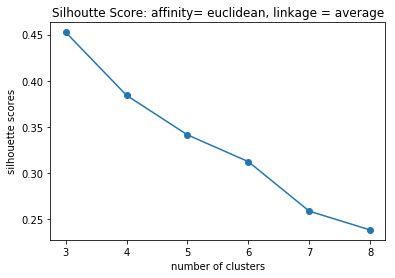

In [229]:
plot_sil_scores_hclust(segment_data, k_vals, 'euclidean', 'average')

In [232]:
hc3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
hc3.fit(segment_data)
labelsh3 = hc3.labels_
database_datah3 = data.copy()
database_datah3['Segment'] = labelsh3
dfh_3 = get_database(database_datah3)

#### Segment Sizes

In [233]:
print('Size of Segment 0: {}'.format(len(labelsh3[labelsh3==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsh3[labelsh3==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsh3[labelsh3==2])/len(segment_data)))
print('Size of Segment 3: {}'.format(len(labelsh3[labelsh3==3])/len(segment_data)))

Size of Segment 0: 0.42779192433612223
Size of Segment 1: 0.532557293561295
Size of Segment 2: 0.012004365223717716
Size of Segment 3: 0.027646416878865043


In [234]:
dfh_3.sort_values(1, ascending = False)

Segment,0,1,2,3
SEGMENT SIZE,1176.00,1464.00,33.00,76.00
Get science news on a lot of different topics,0.00,100.00,100.00,0.00
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",82.14,88.39,72.73,82.89
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,95.66,87.57,100.00,88.16
Live in metro area,84.01,87.09,93.94,92.11
Science news is boring is not a reason to not follow science news,64.88,86.82,66.67,78.95
Interested in health & medicine,68.28,83.40,42.42,71.05
I own a smartphone,76.19,82.45,72.73,86.84
I watch/read/listen to news stories that report new scientific discoveries,47.87,81.28,18.18,73.68
The way news reporters cover scientific research findings is a bigger problem than the way science researchers publish new findigns,74.15,80.94,60.61,86.84


## Gaussian Mixture Model

[0.45112717371537525, 0.3928321171527318, 0.3726135222574897, 0.2824167802297458, 0.3250294858530646, 0.315264827648929]


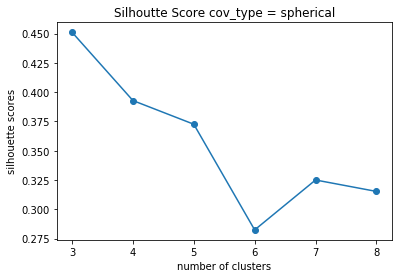

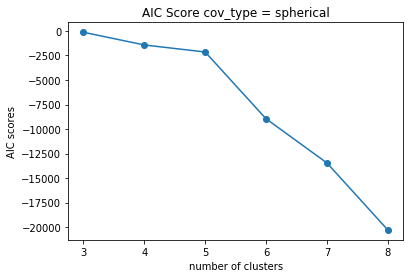

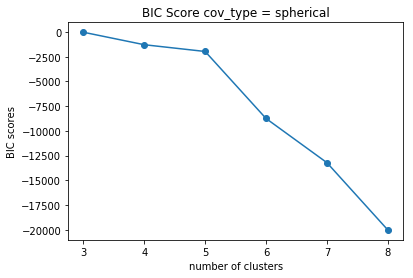

In [205]:
plot_scores_gauss(segment_data, k_vals, 'spherical', max_iter = 100)

### 3 Segment Solution

In [206]:
gm3 = GaussianMixture(n_components = 3, covariance_type=  'spherical')
gm3.fit(segment_data)
labelsg3 = gm3.predict(segment_data)
database_datag3 = data.copy()
database_datag3['Segment'] = labelsg3
dfg_3 = get_database(database_datag3)

#### Segment Sizes

In [246]:
print('Size of Segment 0: {}'.format(len(labelsg3[labelsg3==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsg3[labelsg3==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsg3[labelsg3==2])/len(segment_data)))

Size of Segment 0: 0.5445616587850127
Size of Segment 1: 0.2488177519097854
Size of Segment 2: 0.20662058930520188


#### Looking at the Database

In [277]:
dfg_3.sort_values(0, ascending = False)

Segment,0,1,2
SEGMENT SIZE,1497.00,684.00,568.00
Get science news on a lot of different topics,100.00,0.00,0.00
"SCIENCE FICTION shows focus on entertainment more than getting the science, tech & medicine right",88.04,82.02,82.39
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,87.84,94.30,96.30
Live in metro area,87.24,88.16,80.11
Science news is boring is not a reason to not follow science news,86.37,75.73,53.70
Interested in health & medicine,82.50,73.39,62.50
I own a smartphone,82.23,82.02,70.60
The way news reporters cover scientific research findings is a bigger problem than the way science researchers publish new findigns,80.49,77.49,71.83
I watch/read/listen to news stories that report new scientific discoveries,79.89,63.60,32.39


In [274]:
dfg_3.loc[NEWS_ATTITUDES_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
"I read, watch or listen to science news less often than a few times a month",9.82,22.81,82.92
Very interested in local community news,49.97,39.77,35.92
Most interested in health & medicine,28.12,30.56,32.57
Most interested in food and nutrition,10.35,20.32,24.12
Very interested in sports news,17.57,18.27,19.19
"I read, watch or listen to science news a few times a month",32.06,43.13,17.08
I am too busy to keep up with science news more often is a major reason to not follow science news,8.55,11.11,15.49
Science news is hard to understand is a major reason to not follow science news,4.07,6.87,14.96
The sources I regulary get news from don't cover a lot of science is a major reason to not follow science news,6.55,12.28,11.62
Very interested in business and finance news,26.32,17.11,11.09


In [275]:
dfg_3.loc[HOBBIES_NONSCIENCE_BEHAVIORS].sort_values(2, ascending = False)

Segment,0,1,2
Use social media,68.80,71.93,68.66
"Visited national, state or country park",62.19,52.34,38.56
Attended event with live music,51.90,42.11,36.80
Attended sport event,40.55,40.50,35.21
Visited public library,50.77,47.22,33.80
Visited zoo,33.40,32.60,25.88
Visited art museum,33.93,24.56,11.97
Visited science/tech center/museum,26.05,19.01,8.63
Visited natural history museum,21.91,18.13,7.22
Attended science lecture/talk,16.17,9.06,1.58


In [276]:
dfg_3.loc[DEMOGRAPHICS].sort_values(2, ascending = False)

Segment,0,1,2
Female,42.22,52.92,60.92
Male,57.78,47.08,39.08
55-64 years old,23.45,22.08,22.89
45-54 years old,16.83,17.54,18.13
35-44 years old,15.30,17.54,17.78
65-74,17.64,14.18,15.49
25-34 years old,15.90,17.98,13.91
Industry: Health Care & Social Assistance,7.15,10.67,7.22
Industry: Retail Trade,6.01,5.99,7.04
18-24 years old,4.28,6.43,6.34


### 4 Segment Solution

In [247]:
gm4 = GaussianMixture(n_components = 4, covariance_type=  'spherical')
gm4.fit(segment_data)
labelsg4 = gm4.predict(segment_data)
database_datag4 = data.copy()
database_datag4['Segment'] = labelsg4
dfg_4 = get_database(database_datag4)

#### Segment Sizes

In [248]:
print('Size of Segment 0: {}'.format(len(labelsg4[labelsg4==0])/len(segment_data)))
print('Size of Segment 1: {}'.format(len(labelsg4[labelsg4==1])/len(segment_data)))
print('Size of Segment 2: {}'.format(len(labelsg4[labelsg4==2])/len(segment_data)))
print('Size of Segment 3: {}'.format(len(labelsg4[labelsg4==3])/len(segment_data)))

Size of Segment 0: 0.06802473626773373
Size of Segment 1: 0.5445616587850127
Size of Segment 2: 0.09166969807202618
Size of Segment 3: 0.29574390687522734


#### Looking at the Database

In [250]:
dfg_4.sort_values(0, ascending = False)

Segment,0,1,2,3
SEGMENT SIZE,187.00,1497.00,252.00,813.00
Get science news on a couple topics,100.00,0.00,100.00,100.00
"I do not have science-related hobbies, interests or activities outside of work",98.93,71.74,73.41,91.51
I do not regularly get science new from sources that provide alternative perspectives to conventional science or medical research,98.93,87.84,92.06,95.33
Enjoy science news a lot less than other news,96.26,2.54,1.59,5.29
I don't regularly get news from any of the above about GOVERNMENT AND POLITICS,95.19,59.12,61.90,82.16
"I read, watch or listen to science news less often than a few times a month",94.65,9.82,0.00,55.35
I feel I have a social or civil obligation to stay informed is not a reason to follow science news,93.05,38.94,36.51,57.32
I mostly get science news because I happen to come across it,91.98,61.32,55.95,81.18
TURN: Not Asked,91.44,38.28,34.52,71.46
